In [1]:
import pandas as pd
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

pd.set_option('display.max_rows', 50)  
pd.set_option('display.max_columns', 50)
flight = pd.read_csv('completed_flights.csv')

In [2]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   flight_id         127 non-null    int64  
 1   flight_no         127 non-null    object 
 2   model             127 non-null    object 
 3   departure_city    127 non-null    object 
 4   arrival_city      127 non-null    object 
 5   actual_departure  127 non-null    object 
 6   actual_arrival    127 non-null    object 
 7   flight_time       127 non-null    int64  
 8   last_departure    127 non-null    int64  
 9   seat_business     127 non-null    int64  
 10  seat_economy      127 non-null    int64  
 11  seat_total        127 non-null    int64  
 12  aircraft_code     127 non-null    object 
 13  sold_business     118 non-null    float64
 14  sold_economy      118 non-null    float64
 15  sold_total        118 non-null    float64
 16  amount_economy    118 non-null    float64
 1

На этих рейсах не предоставляются билеты Comfort поэтому в выборке они не учитываются. Как видим у нас есть 9 рейсов, у которых нет информации о продажах, поэтому эти данные можно удалить.

In [3]:
flight.dropna(inplace=True)
flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   flight_id         118 non-null    int64  
 1   flight_no         118 non-null    object 
 2   model             118 non-null    object 
 3   departure_city    118 non-null    object 
 4   arrival_city      118 non-null    object 
 5   actual_departure  118 non-null    object 
 6   actual_arrival    118 non-null    object 
 7   flight_time       118 non-null    int64  
 8   last_departure    118 non-null    int64  
 9   seat_business     118 non-null    int64  
 10  seat_economy      118 non-null    int64  
 11  seat_total        118 non-null    int64  
 12  aircraft_code     118 non-null    object 
 13  sold_business     118 non-null    float64
 14  sold_economy      118 non-null    float64
 15  sold_total        118 non-null    float64
 16  amount_economy    118 non-null    float64
 1

In [4]:
flight.sample(10)

,flight_id,flight_no,model,departure_city,arrival_city,actual_departure,actual_arrival,flight_time,last_departure,seat_business,seat_economy,seat_total,aircraft_code,sold_business,sold_economy,sold_total,amount_economy,amount_business,amount_total
28,136758,PG0480,Sukhoi Superjet-100,Anapa,Belgorod,2017-01-12 09:26:00.000000,2017-01-12 10:15:00.000000,49,1,12,85,97,SU9,12.0,85.0,97.0,538500.0,226800.0,765300.0
87,136215,PG0252,Boeing 737-300,Anapa,Moscow,2017-02-28 10:09:00.000000,2017-02-28 11:49:00.000000,100,4,12,118,130,733,11.0,103.0,114.0,1261400.0,402600.0,1664000.0
73,136131,PG0252,Boeing 737-300,Anapa,Moscow,2017-01-28 10:07:00.000000,2017-01-28 11:46:00.000000,99,2,12,118,130,733,12.0,112.0,124.0,1373600.0,439200.0,1812800.0
99,136293,PG0252,Boeing 737-300,Anapa,Moscow,2017-01-23 10:09:00.000000,2017-01-23 11:48:00.000000,99,4,12,118,130,733,12.0,102.0,114.0,1250400.0,439200.0,1689600.0
67,136479,PG0252,Boeing 737-300,Anapa,Moscow,2017-02-21 10:08:00.000000,2017-02-21 11:47:00.000000,99,3,12,118,130,733,10.0,112.0,122.0,1372400.0,366000.0,1738400.0
31,136778,PG0480,Sukhoi Superjet-100,Anapa,Belgorod,2017-02-22 09:26:00.000000,2017-02-22 10:16:00.000000,50,1,12,85,97,SU9,12.0,84.0,96.0,532200.0,226800.0,759000.0
24,136733,PG0480,Sukhoi Superjet-100,Anapa,Belgorod,2017-01-09 09:27:00.000000,2017-01-09 10:18:00.000000,51,2,12,85,97,SU9,12.0,82.0,94.0,519600.0,226800.0,746400.0
103,136322,PG0252,Boeing 737-300,Anapa,Moscow,2017-02-06 10:11:00.000000,2017-02-06 11:52:00.000000,101,6,12,118,130,733,10.0,98.0,108.0,1201600.0,366000.0,1567600.0
64,136463,PG0252,Boeing 737-300,Anapa,Moscow,2017-01-20 10:06:00.000000,2017-01-20 11:45:00.000000,99,1,12,118,130,733,12.0,110.0,122.0,1349200.0,439200.0,1788400.0
78,136164,PG0252,Boeing 737-300,Anapa,Moscow,2017-01-07 10:07:00.000000,2017-01-07 11:46:00.000000,99,2,12,118,130,733,11.0,109.0,120.0,1335800.0,402600.0,1738400.0


In [5]:
flight.groupby(by=['arrival_city', 'model']).flight_id.count()

arrival_city  model              
Belgorod      Sukhoi Superjet-100    59
Moscow        Boeing 737-300         59
Name: flight_id, dtype: int64

Исходя из этой информации, можем сделать вывод что в Белгород летает Sukhoi Superjet-100, а в Москву Boeing 737-300. Расстояние, которое пролетают самолёты разное, вместимость пассажиров разная поэтому и потребление топлива будет разным. Расход топлива у Sukhoi Superjet-100 равен 1700кг в 1 час, у Boeing 737-300 равен 2600кг на 1 час. Цены на топливо - https://favt.gov.ru/dejatelnost-ajeroporty-i-ajerodromy-ceny-na-aviagsm/?id=7329

In [6]:
fuel_consumption = {'SU9': 1.7, '733': 2.6}
fuel_costs = {12: 38867, 1: 41435, 2: 39553}

In [7]:
flight['fuel_consumption'] = flight['aircraft_code'].map(fuel_consumption)
flight['month'] = flight['actual_departure'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f').month)
flight['fuel_costs'] = flight['month'].map(fuel_costs)
flight['flight_costs'] = round((flight['flight_time']/60) * flight['fuel_consumption'] * flight['fuel_costs'])
flight['profit'] = flight['amount_total'] - flight['flight_costs']

In [8]:
profit_statistics = flight.groupby('arrival_city').amount_total.agg(['min', 'mean', 'max']).astype('int64').reset_index()

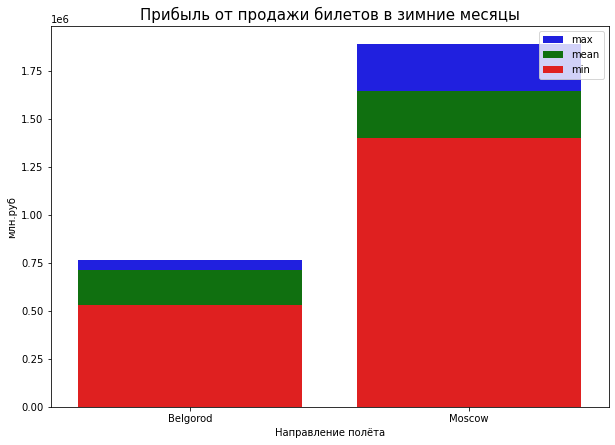

In [9]:
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(x='arrival_city', y='max', data=profit_statistics,color = 'b', label = 'max')
sns.barplot(x='arrival_city', y='mean', data=profit_statistics, color = 'g', label = 'mean')
sns.barplot(x='arrival_city', y='min', data=profit_statistics, color = 'r', label = 'min')
ax.legend(loc = 1)
plt.ylabel(None)
ax.set_title('Прибыль от продажи билетов в зимние месяцы',fontsize= 15)
ax.set_xlabel('Направление полёта')
ax.set_ylabel('млн.руб');

Исходя из графика можно сделать вывод что прибыль сильно разнится из-за направления, т.к. время полёта в Москву больше чем в Белгород.

In [10]:
flight['actual_arrival'] = pd.to_datetime(flight['actual_arrival'])
flight.loc[:, 'weekdays'] = flight['actual_arrival'].apply(lambda x: x.weekday() + 1)
weekdays = {1:'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 7: 'Sun'}
flight['weekdays'] = flight['weekdays'].map(weekdays)

In [11]:
flight['occupied_seats'] = round(flight['sold_total']/flight['seat_total'], 2)
flight.sample(10)

,flight_id,flight_no,model,departure_city,arrival_city,actual_departure,actual_arrival,flight_time,last_departure,seat_business,seat_economy,seat_total,aircraft_code,sold_business,sold_economy,sold_total,amount_economy,amount_business,amount_total,fuel_consumption,month,fuel_costs,flight_costs,profit,weekdays,occupied_seats
46,136871,PG0480,Sukhoi Superjet-100,Anapa,Belgorod,2017-01-13 09:28:00.000000,2017-01-13 10:18:00,50,3,12,85,97,SU9,12.0,85.0,97.0,538500.0,226800.0,765300.0,1.7,1,41435,58700.0,706600.0,Fri,1.00
25,136754,PG0480,Sukhoi Superjet-100,Anapa,Belgorod,2017-02-06 09:29:00.000000,2017-02-06 10:18:00,49,4,12,85,97,SU9,12.0,78.0,90.0,494400.0,226800.0,721200.0,1.7,2,39553,54913.0,666287.0,Mon,0.93
50,136900,PG0480,Sukhoi Superjet-100,Anapa,Belgorod,2017-02-01 09:30:00.000000,2017-02-01 10:21:00,51,5,12,85,97,SU9,12.0,85.0,97.0,538500.0,226800.0,765300.0,1.7,2,39553,57154.0,708146.0,Wed,1.00
110,136387,PG0252,Boeing 737-300,Anapa,Moscow,2017-01-19 10:08:00.000000,2017-01-19 11:47:00,99,3,12,118,130,733,12.0,109.0,121.0,1335800.0,439200.0,1775000.0,2.6,1,41435,177756.0,1597244.0,Thu,0.93
78,136164,PG0252,Boeing 737-300,Anapa,Moscow,2017-01-07 10:07:00.000000,2017-01-07 11:46:00,99,2,12,118,130,733,11.0,109.0,120.0,1335800.0,402600.0,1738400.0,2.6,1,41435,177756.0,1560644.0,Sat,0.92
44,136861,PG0480,Sukhoi Superjet-100,Anapa,Belgorod,2017-02-12 09:28:00.000000,2017-02-12 10:17:00,49,3,12,85,97,SU9,11.0,76.0,87.0,481200.0,207900.0,689100.0,1.7,2,39553,54913.0,634187.0,Sun,0.90
62,136452,PG0252,Boeing 737-300,Anapa,Moscow,2017-02-17 10:08:00.000000,2017-02-17 11:48:00,100,3,12,118,130,733,11.0,98.0,109.0,1200400.0,402600.0,1603000.0,2.6,2,39553,171396.0,1431604.0,Fri,0.84
67,136479,PG0252,Boeing 737-300,Anapa,Moscow,2017-02-21 10:08:00.000000,2017-02-21 11:47:00,99,3,12,118,130,733,10.0,112.0,122.0,1372400.0,366000.0,1738400.0,2.6,2,39553,169682.0,1568718.0,Tue,0.94
91,136264,PG0252,Boeing 737-300,Anapa,Moscow,2017-02-18 10:07:00.000000,2017-02-18 11:47:00,100,2,12,118,130,733,11.0,105.0,116.0,1288200.0,402600.0,1690800.0,2.6,2,39553,171396.0,1519404.0,Sat,0.89
101,136316,PG0252,Boeing 737-300,Anapa,Moscow,2017-01-12 10:07:00.000000,2017-01-12 11:47:00,100,2,12,118,130,733,12.0,118.0,130.0,1446800.0,439200.0,1886000.0,2.6,1,41435,179552.0,1706448.0,Thu,1.00


In [12]:
belgorod = flight.query('arrival_city == "Belgorod"').groupby('weekdays').mean()
moscow = flight.query('arrival_city == "Moscow"').groupby('weekdays').mean()

[Text(0.5, 0, 'День недели'), Text(0, 0.5, 'Заполненность рейсов в Белгород')]

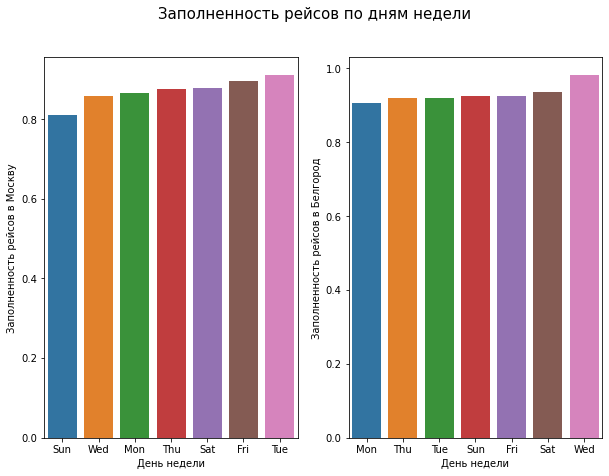

In [13]:
fig, ax = plt.subplots(1,2, figsize = (10,7))
fig.suptitle('Заполненность рейсов по дням недели', fontsize= 15)
sns.barplot(data = moscow, y = 'occupied_seats', x = moscow.index, order = moscow.sort_values(by = 'occupied_seats').index, ax = ax[0])
sns.barplot(data = belgorod, y = 'occupied_seats', x = belgorod.index, order = belgorod.sort_values(by = 'occupied_seats').index, ax = ax[1])
ax[0].set(xlabel = 'День недели', ylabel = 'Заполненность рейсов в Москву')
ax[1].set(xlabel = 'День недели', ylabel = 'Заполненность рейсов в Белгород')

На гистограмме видно, что рейсы в Белгород заполнены на 90 и больше процентов. В москву заполнены на 80 и больше процентов. По средам в Белгород рейсы заполненне, в Москву рейсы заполненне немного по вторникам. Хуже всего заполнены рейсы в Белгород по понедельникам,а в Москву хуже всего заполнены рейсы по воскресеньям.

In [14]:
flight[flight.occupied_seats < 0.75]

,flight_id,flight_no,model,departure_city,arrival_city,actual_departure,actual_arrival,flight_time,last_departure,seat_business,seat_economy,seat_total,aircraft_code,sold_business,sold_economy,sold_total,amount_economy,amount_business,amount_total,fuel_consumption,month,fuel_costs,flight_costs,profit,weekdays,occupied_seats
10,136642,PG0480,Sukhoi Superjet-100,Anapa,Belgorod,2017-01-30 09:28:00.000000,2017-01-30 10:17:00,49,3,12,85,97,SU9,10.0,54.0,64.0,342000.0,189000.0,531000.0,1.7,1,41435,57526.0,473474.0,Mon,0.66
35,136807,PG0480,Sukhoi Superjet-100,Anapa,Belgorod,2017-02-23 09:28:00.000000,2017-02-23 10:18:00,50,3,12,85,97,SU9,8.0,60.0,68.0,379800.0,151200.0,531000.0,1.7,2,39553,56033.0,474967.0,Thu,0.70


Два рейса с загруженностью меньше 75% из Анапы в Белгород на Sukhoi Superjet-100 в Понедельник и Четверг. Плохая заполненность в Белгород по понедельникам сходится с тем, что было сказано выше на гистограмме.

### Итог

Выходит так, что рейсы и в Белгород и в Москву показывают себя хорошо. Заполненность больше 75% практически всегда. Рейсы в Москву показывают себя чуть менее выходными именно в воскресенье, нежели в другие дни недели. Сложно сравнивать два разных самолёта летающих двумя разными маршрутами. Нам неизвестно, во сколько обходится содержание каждого из типов самолёта. Исходя из вышеперечисленного можно сказать что на данный момент, рейсы в Москву выглядят выгоднее чем в Белгород.

### Советы

Привлечь людей акциями для увеления пассажиропотока. По воскресеньям можно отправлять в Москву Sukhoi Superjet-100 а в Белгород Boeing 737-300 т.к. как мы выяснили по воскресеньям загруженность меньше. Можно попробовать использовать другой менее дорогой самолёт.